In [44]:
import pandas as pd

# Load the dataset
data_path = 'Downloads/data_with_target.csv'  
data = pd.read_csv(data_path)

# Create a target column based on 'cdi' values
data['target'] = (data['cdi'] > 0.9).astype(int)


In [45]:
data.head()

,year,month,district,pcode,rfe,ndvi,temp,pdi,tdi,vdi,cdi,target,district_encoded
0,2024,1,Adan Yabaal,2102,2.824249,0.465002,33.830894,2.11,1.52,1.73,1.96,1,0
1,2023,12,Adan Yabaal,2102,9.193325,0.535684,33.044262,1.89,1.41,1.48,1.77,1,0
2,2023,11,Adan Yabaal,2102,161.675256,0.510567,29.884741,1.93,1.41,1.43,1.80,1,0
3,2023,10,Adan Yabaal,2102,112.911853,0.332909,34.168072,0.83,1.15,1.28,0.91,1,0
4,2023,9,Adan Yabaal,2102,1.517815,0.226586,36.887307,0.45,1.13,1.07,0.62,0,0


In [63]:
from sklearn.metrics import classification_report

# Preparing the data for the model
X = data[['year', 'month', 'pcode']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluating the model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy as a percentage
print(f"Decision Tree Model Accuracy: {accuracy * 100:.2f}%")

# Generating the classification report
class_report = classification_report(y_test, y_pred)

# Displaying the classification report
print("Classification Report for Decision Tree Model:")
print(class_report)


Decision Tree Model Accuracy: 86.96%
Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2994
           1       0.87      0.87      0.87      3073

    accuracy                           0.87      6067
   macro avg       0.87      0.87      0.87      6067
weighted avg       0.87      0.87      0.87      6067



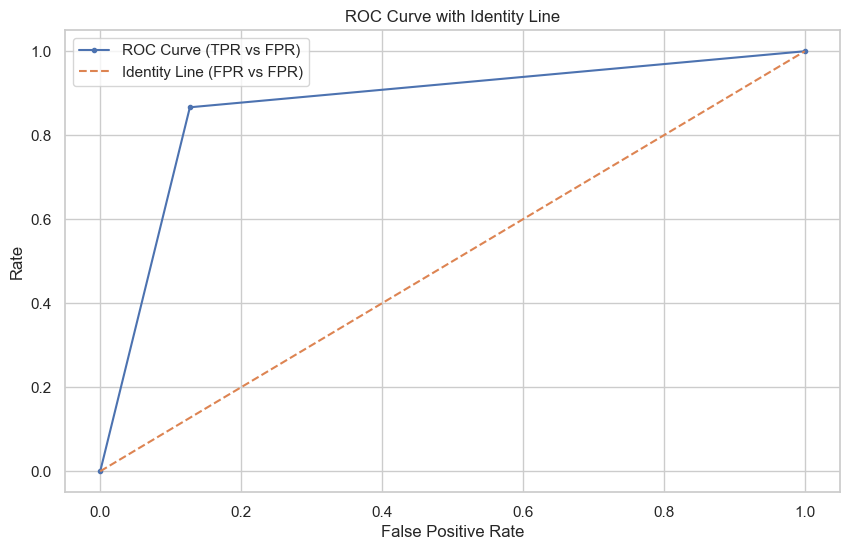

In [71]:
# Plotting both the TPR graph and the Identity Line in one figure
plt.figure(figsize=(10, 6))

plt.title('ROC Curve with Identity Line')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.plot(fpr, tpr, marker='.', label='ROC Curve (TPR vs FPR)')
plt.plot(fpr, fpr, linestyle='--', label='Identity Line (FPR vs FPR)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


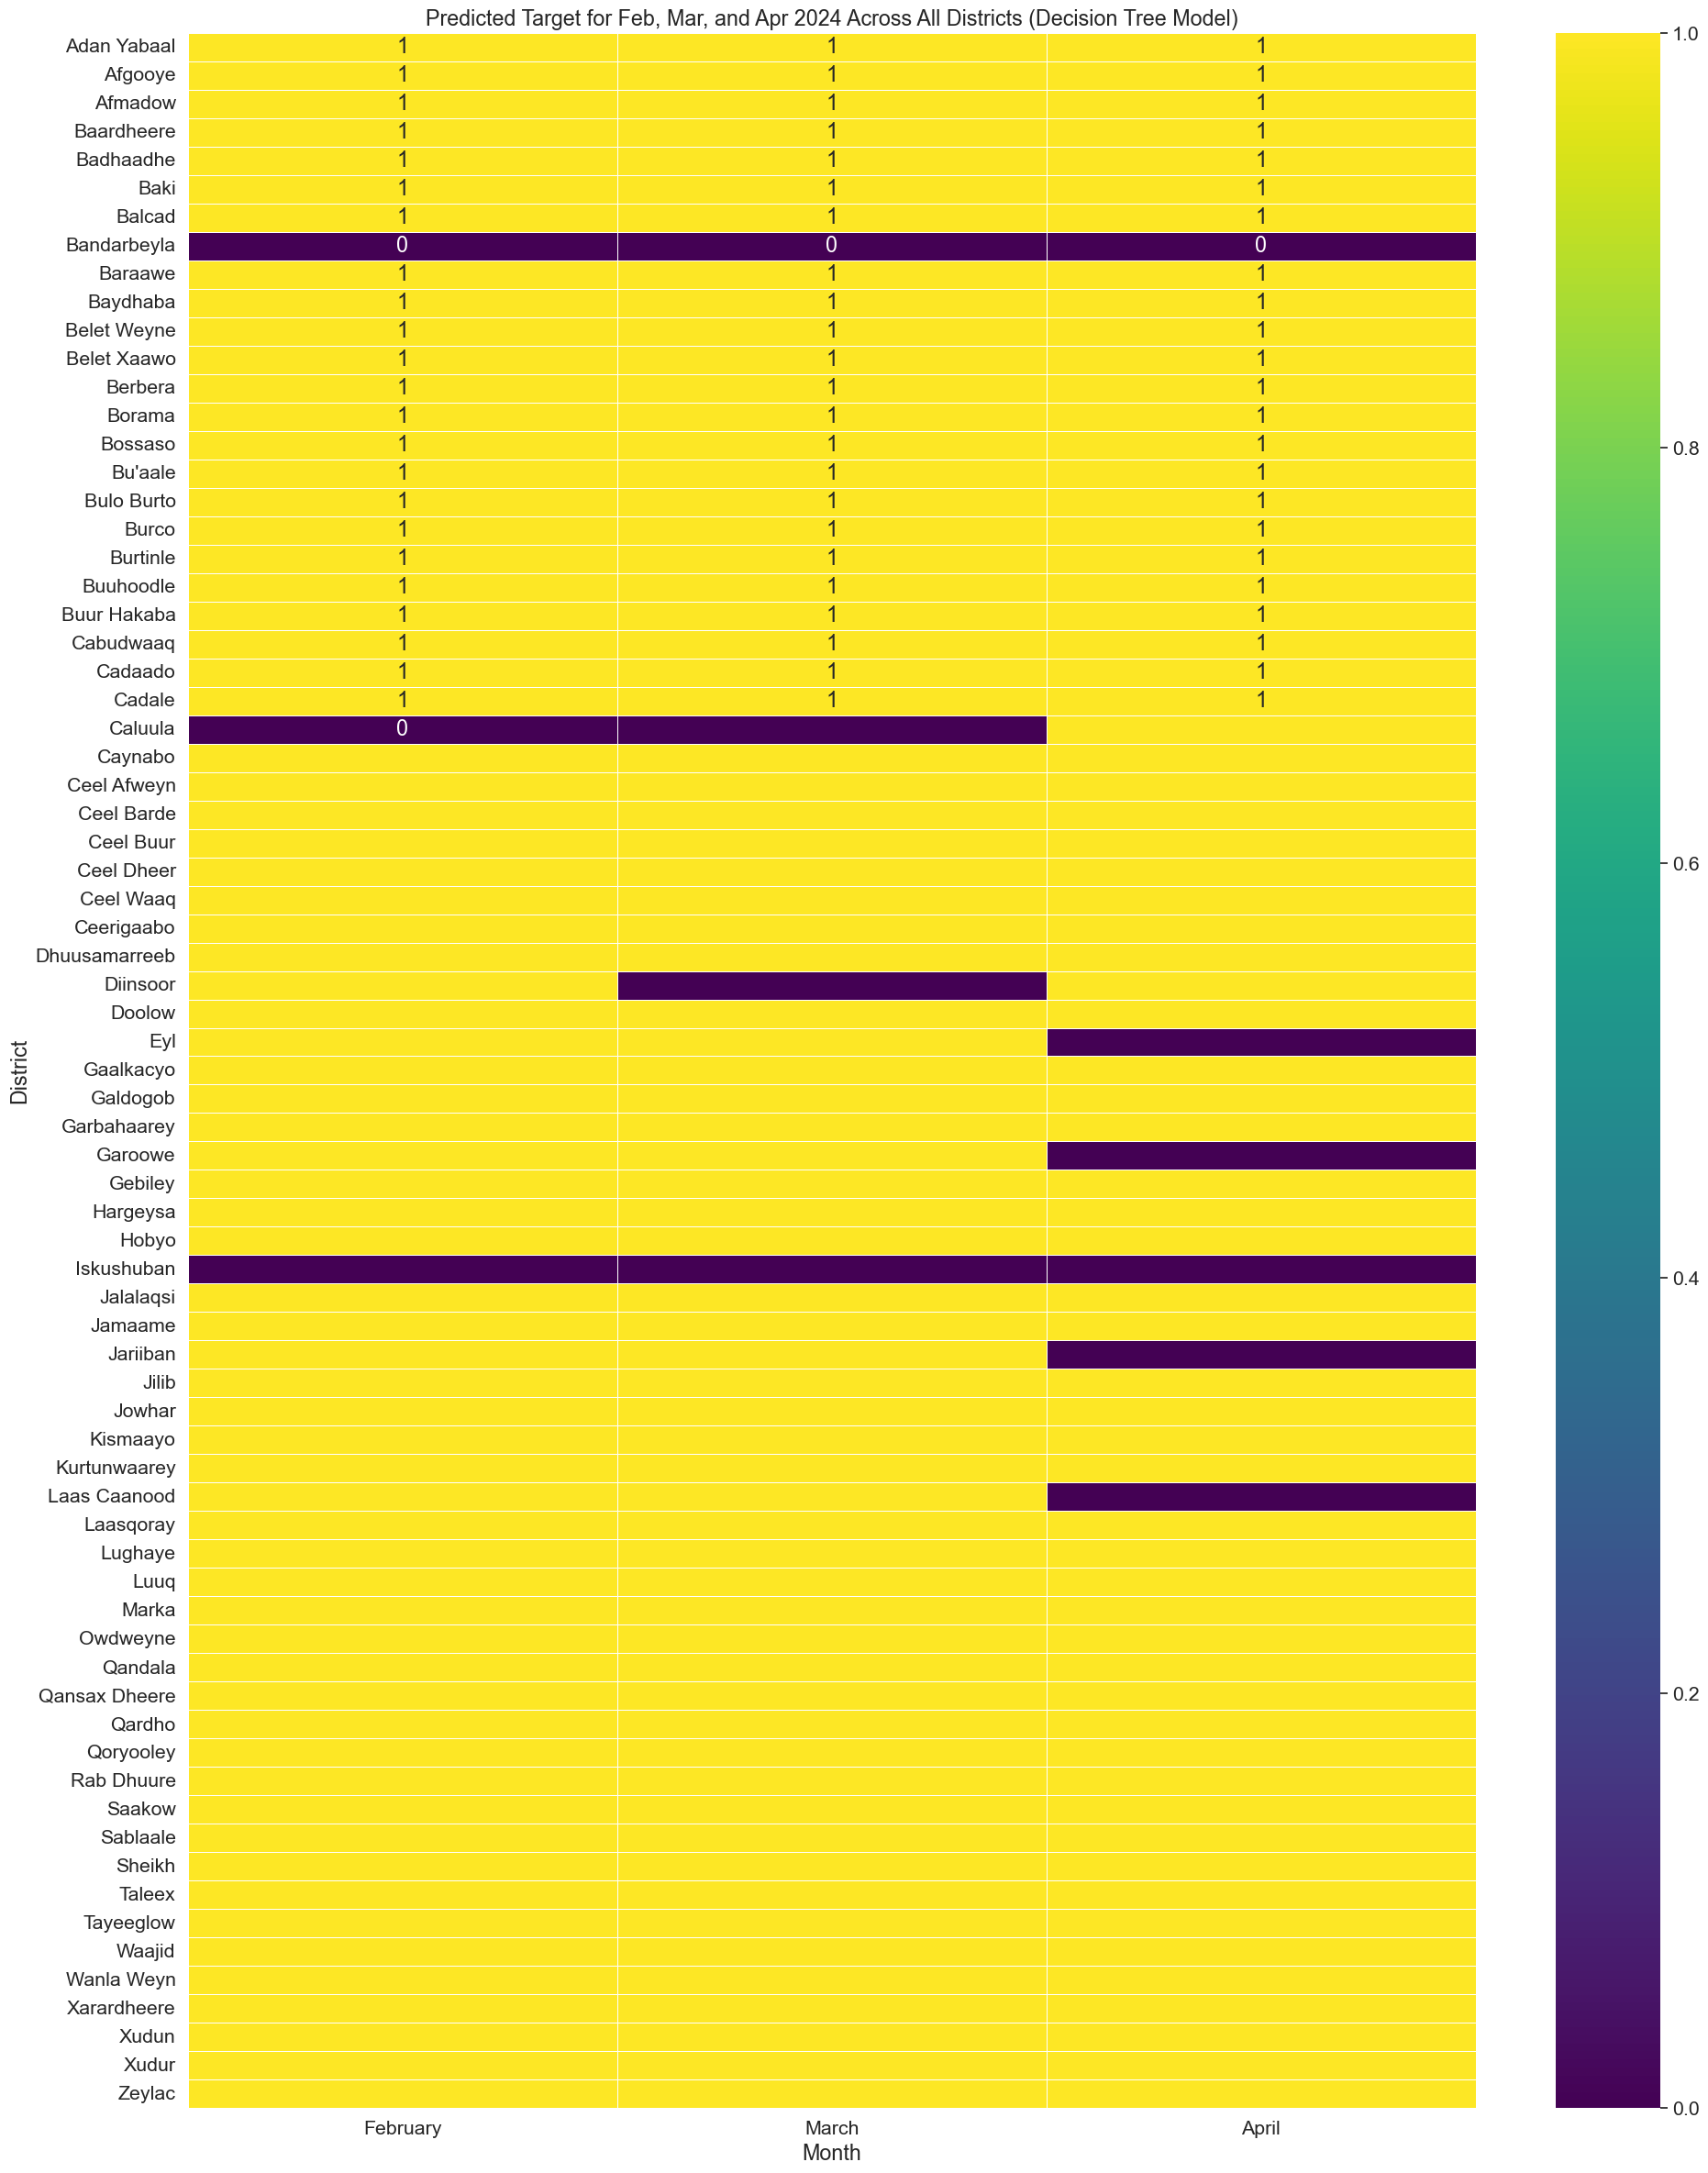

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already loaded and includes the necessary columns

# Encoding the 'district' column
label_encoder = LabelEncoder()
data['district_encoded'] = label_encoder.fit_transform(data['district'])

# Selecting features and target
X = data[['year', 'month', 'pcode', 'district_encoded']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Preparing the data for prediction
predict_months = [2, 3, 4]  # February, March, April of 2024
unique_pcodes = data['pcode'].unique()
predict_data = pd.DataFrame([(2024, month, pcode, label_encoder.transform([district])[0]) 
                             for pcode in unique_pcodes for month in predict_months 
                             for district in data[data['pcode'] == pcode]['district'].unique()],
                            columns=['year', 'month', 'pcode', 'district_encoded'])

# Predicting the target
predictions = dt_classifier.predict(predict_data)
predict_data['predicted_target'] = predictions

# Merging predicted data with original data to get district names
merged_data = predict_data.merge(data[['pcode', 'district']].drop_duplicates(), on='pcode')

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = merged_data.pivot(index="district", columns="month", values="predicted_target")

# Plotting the heatmap
plt.figure(figsize=(220, 24))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=True, linewidths=0.5, linecolor='white')

plt.title('Predicted Target for Feb, Mar, and Apr 2024 Across All Districts (Decision Tree Model)')
plt.xlabel('Month')
plt.ylabel('District')
plt.xticks([0.5, 1.5, 2.5], ['February', 'March', 'April'])
plt.tight_layout()

plt.show()


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML

# Assuming 'data' is already loaded and includes the necessary columns

# Encoding the 'district' column
label_encoder = LabelEncoder()
data['district_encoded'] = label_encoder.fit_transform(data['district'])

# Selecting features and target
X = data[['year', 'month', 'pcode', 'district_encoded']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Preparing the data for prediction
predict_months = [2, 3, 4]  # February, March, April of 2024
unique_pcodes = data['pcode'].unique()
predict_data = pd.DataFrame([(2024, month, pcode, label_encoder.transform([district])[0]) 
                             for pcode in unique_pcodes for month in predict_months 
                             for district in data[data['pcode'] == pcode]['district'].unique()],
                            columns=['year', 'month', 'pcode', 'district_encoded'])

# Predicting the target
predictions = dt_classifier.predict(predict_data)
predict_data['predicted_target'] = predictions

# Mapping 0 and 1 to "Drought" and "No Drought"
predict_data['predicted_target'] = predict_data['predicted_target'].map({0: 'Drought', 1: 'No Drought'})

# Merging predicted data with original data to get district names
merged_data = predict_data.merge(data[['pcode', 'district']].drop_duplicates(), on='pcode')

# Creating a beautiful table
table_data = merged_data.pivot(index="district", columns="month", values="predicted_target")

# Adding column names
table_data.columns = ['February', 'March', 'April']

# Resetting index to have 'district' as a column
table_data = table_data.reset_index()

# Function to apply background colors
def highlight_drought(s):
    color = ['background-color: red; color: black' if v == 'Drought' else 'background-color: green; color: black' for v in s]
    return color

def highlight_district(s):
    return ['background-color: white; color: black'] * len(s)

# Applying styles using Styler.apply
styled_table = table_data.style.apply(highlight_drought, subset=['February', 'March', 'April'], axis=1) \
                               .apply(highlight_district, subset=['district'], axis=1) \
                               .set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('color', '#333'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black'), ('padding', '5px' ),('width', '250px')]
    }]
).set_caption("Predicted Targets for February, March, and April 2024 For Decission tree model" )

display(styled_table)


,district,February,March,April
0,Adan Yabaal,No Drought,No Drought,No Drought
1,Afgooye,No Drought,No Drought,No Drought
2,Afmadow,No Drought,No Drought,No Drought
3,Baardheere,No Drought,No Drought,No Drought
4,Badhaadhe,No Drought,No Drought,No Drought
5,Baki,No Drought,No Drought,No Drought
6,Balcad,No Drought,No Drought,No Drought
7,Bandarbeyla,Drought,Drought,Drought
8,Baraawe,No Drought,No Drought,No Drought
9,Baydhaba,No Drought,No Drought,No Drought


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML

# Assuming 'data' is already loaded and includes the necessary columns

# Encoding the 'district' column
label_encoder = LabelEncoder()
data['district_encoded'] = label_encoder.fit_transform(data['district'])

# Selecting features and target
X = data[['year', 'month', 'pcode', 'district_encoded']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Preparing the data for prediction
predict_months = [2, 3, 4]  # February, March, April of 2024
unique_pcodes = data['pcode'].unique()
predict_data = pd.DataFrame([(2024, month, pcode, label_encoder.transform([district])[0]) 
                             for pcode in unique_pcodes for month in predict_months 
                             for district in data[data['pcode'] == pcode]['district'].unique()],
                            columns=['year', 'month', 'pcode', 'district_encoded'])

# Predicting the target
predictions = dt_classifier.predict(predict_data)
predict_data['predicted_target'] = predictions

# Mapping 0 and 1 to "Drought" and "No Drought"
predict_data['predicted_target'] = predict_data['predicted_target'].map({0: '0', 1: '1'})

# Merging predicted data with original data to get district names
merged_data = predict_data.merge(data[['pcode', 'district']].drop_duplicates(), on='pcode')

# Creating a beautiful table
table_data = merged_data.pivot(index="district", columns="month", values="predicted_target")

# Adding column names
table_data.columns = ['February', 'March', 'April']

# Resetting index to have 'district' as a column
table_data = table_data.reset_index()

# Function to apply background colors
def highlight_drought(s):
    color = ['background-color: red; color: black' if v == 'Drought' else 'background-color: green; color: black' for v in s]
    return color

def highlight_district(s):
    return ['background-color: white; color: black'] * len(s)

# Applying styles using Styler.apply
styled_table = table_data.style.apply(highlight_drought, subset=['February', 'March', 'April'], axis=1) \
                               .apply(highlight_district, subset=['district'], axis=1) \
                               .set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('color', '#333'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black'), ('padding', '5px'),('width', '250px')]
    }]
).set_caption("Predicted Targets for February, March, and April 2024 For Decission tree model")

display(styled_table)


,district,February,March,April
0,Adan Yabaal,1,1,1
1,Afgooye,1,1,1
2,Afmadow,1,1,1
3,Baardheere,1,1,1
4,Badhaadhe,1,1,1
5,Baki,1,1,1
6,Balcad,1,1,1
7,Bandarbeyla,0,0,0
8,Baraawe,1,1,1
9,Baydhaba,1,1,1


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[2613  381]
 [ 410 2663]]


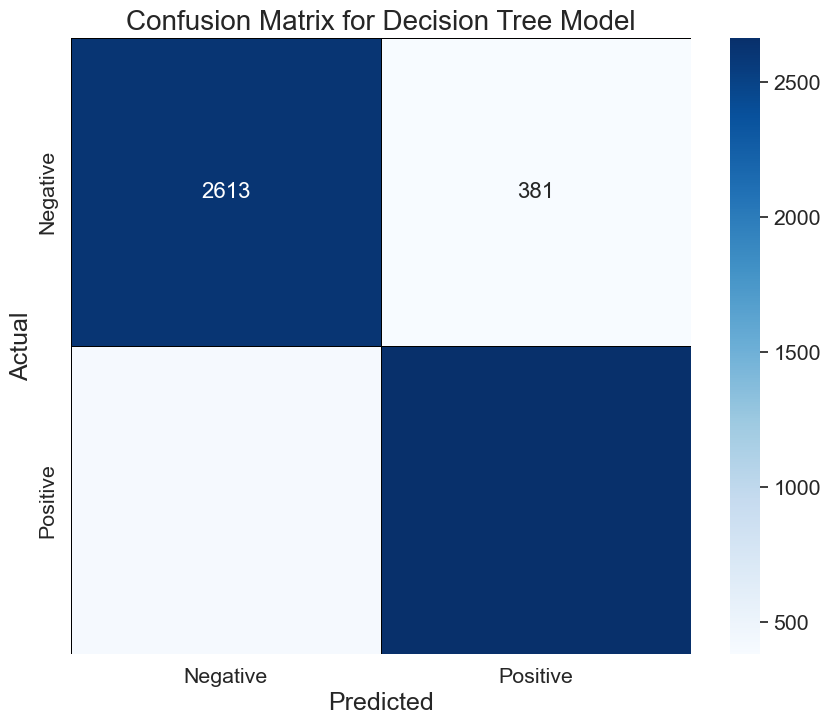

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], linewidths=0.5, linecolor='black')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix for Decision Tree Model', fontsize=20)
plt.show()


In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Including more predictive features
X = data[['year', 'month', 'pcode', 'rfe', 'ndvi', 'temp', 'pdi', 'tdi', 'vdi', 'cdi']]
y = data['target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the SVM model
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluating the model
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy as a percentage
print(f"SVM Model Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


SVM Model Accuracy: 98.98%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2994
           1       0.99      0.99      0.99      3073

    accuracy                           0.99      6067
   macro avg       0.99      0.99      0.99      6067
weighted avg       0.99      0.99      0.99      6067



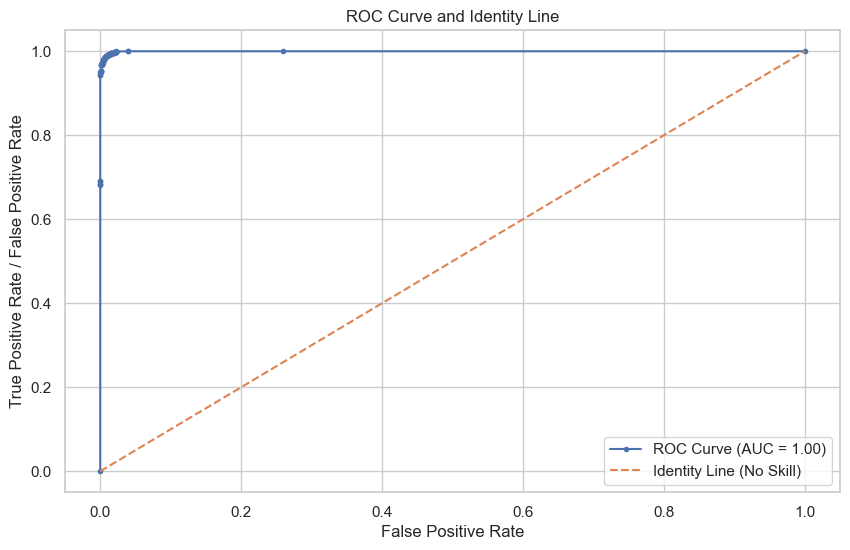

In [75]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for the SVM model
fpr, tpr, _ = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)  # AUC for the ROC

# Plotting both the ROC curve and the Identity line in one figure
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', marker='.', linestyle='-')
plt.plot(fpr, fpr, linestyle='--', label='Identity Line (No Skill)')
plt.title('ROC Curve and Identity Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate / False Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


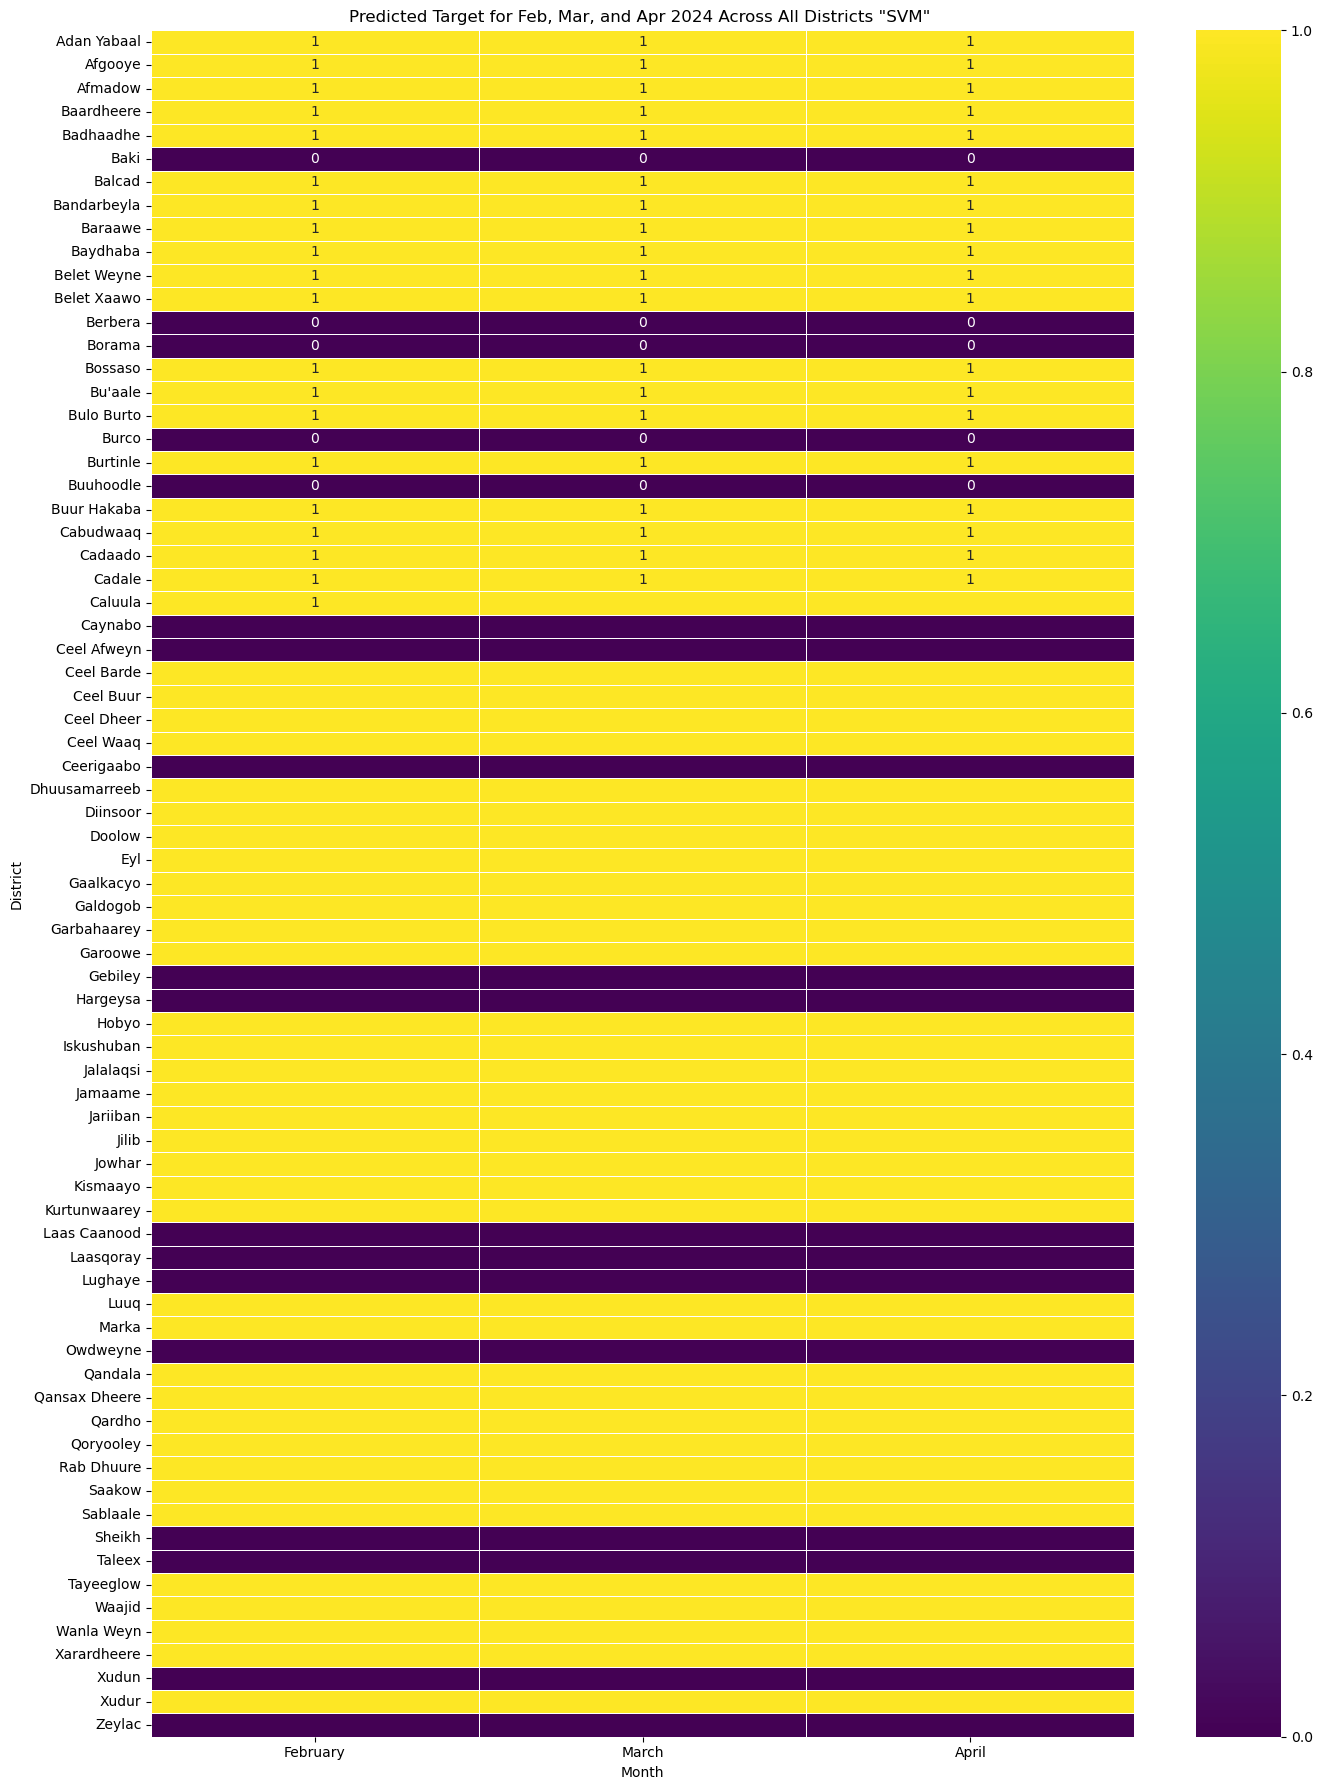

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'Downloads/data_with_target.csv'  
data = pd.read_csv(data_path)

# Create a new column 'target' based on 'cdi' values
data['target'] = (data['cdi'] > 0.9).astype(int)

# Encoding the 'district' column
label_encoder = LabelEncoder()
data['district_encoded'] = label_encoder.fit_transform(data['district'])

# Selecting features and target
X = data[['year', 'month', 'pcode', 'district_encoded']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the SVM model
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Preparing the data for prediction
predict_months = [2, 3, 4]  # February, March, April of 2024
unique_pcodes = data['pcode'].unique()
predict_data = pd.DataFrame([(2024, month, pcode, label_encoder.transform([district])[0]) 
                             for pcode in unique_pcodes for month in predict_months 
                             for district in data[data['pcode'] == pcode]['district'].unique()],
                            columns=['year', 'month', 'pcode', 'district_encoded'])

# Predicting the target
predictions = svm_classifier.predict(predict_data[['year', 'month', 'pcode', 'district_encoded']])
predict_data['predicted_target'] = predictions

# Merging predicted data with original data to get district names
merged_data = predict_data.merge(data[['pcode', 'district']].drop_duplicates(), on='pcode')

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = merged_data.pivot(index="district", columns="month", values="predicted_target")

# Plotting the heatmap
plt.figure(figsize=(14, 18))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=True, linewidths=0.5, linecolor='white')

plt.title('Predicted Target for Feb, Mar, and Apr 2024 Across All Districts "SVM" ')
plt.xlabel('Month')
plt.ylabel('District')
plt.xticks([0.5, 1.5, 2.5], ['February', 'March', 'April'])
plt.tight_layout()

plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from IPython.display import display, HTML

# Load the dataset
data_path = 'Downloads/data_with_target.csv'  
data = pd.read_csv(data_path)

# Create a new column 'target' based on 'cdi' values
data['target'] = (data['cdi'] > 0.9).astype(int)

# Encoding the 'district' column
label_encoder = LabelEncoder()
data['district_encoded'] = label_encoder.fit_transform(data['district'])

# Selecting features and target
X = data[['year', 'month', 'pcode', 'district_encoded']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the SVM model
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Preparing the data for prediction
predict_months = [2, 3, 4]  # February, March, April of 2024
unique_pcodes = data['pcode'].unique()
predict_data = pd.DataFrame([(2024, month, pcode, label_encoder.transform([district])[0]) 
                             for pcode in unique_pcodes for month in predict_months 
                             for district in data[data['pcode'] == pcode]['district'].unique()],
                            columns=['year', 'month', 'pcode', 'district_encoded'])

# Predicting the target
predictions = svm_classifier.predict(predict_data[['year', 'month', 'pcode', 'district_encoded']])
predict_data['predicted_target'] = predictions

# Mapping 0 and 1 to "Drought" and "No Drought"
predict_data['predicted_target'] = predict_data['predicted_target'].map({0: 'Drought', 1: 'No Drought'})

# Merging predicted data with original data to get district names
merged_data = predict_data.merge(data[['pcode', 'district']].drop_duplicates(), on='pcode')

# Creating a beautiful table
table_data = merged_data.pivot(index="district", columns="month", values="predicted_target")

# Adding column names
table_data.columns = ['February', 'March', 'April']

# Resetting index to have 'district' as a column
table_data = table_data.reset_index()

# Function to apply background colors
def highlight_drought(s):
    color = ['background-color: red; color: black' if v == 'Drought' else 'background-color: green; color: black' for v in s]
    return color

def highlight_district(s):
    return ['background-color: white; color: black'] * len(s)

# Applying styles using Styler.apply
styled_table = table_data.style.apply(highlight_drought, subset=['February', 'March', 'April'], axis=1) \
                               .apply(highlight_district, subset=['district'], axis=1) \
                               .set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('color', '#333'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black'), ('padding', '5px'),('width', '250px')]
    }]
).set_caption("Predicted Targets for February, March, and April 2024 (SVM Model)")

display(styled_table)


,district,February,March,April
0,Adan Yabaal,No Drought,No Drought,No Drought
1,Afgooye,No Drought,No Drought,No Drought
2,Afmadow,No Drought,No Drought,No Drought
3,Baardheere,No Drought,No Drought,No Drought
4,Badhaadhe,No Drought,No Drought,No Drought
5,Baki,Drought,Drought,Drought
6,Balcad,No Drought,No Drought,No Drought
7,Bandarbeyla,No Drought,No Drought,No Drought
8,Baraawe,No Drought,No Drought,No Drought
9,Baydhaba,No Drought,No Drought,No Drought


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[2613  381]
 [ 410 2663]]


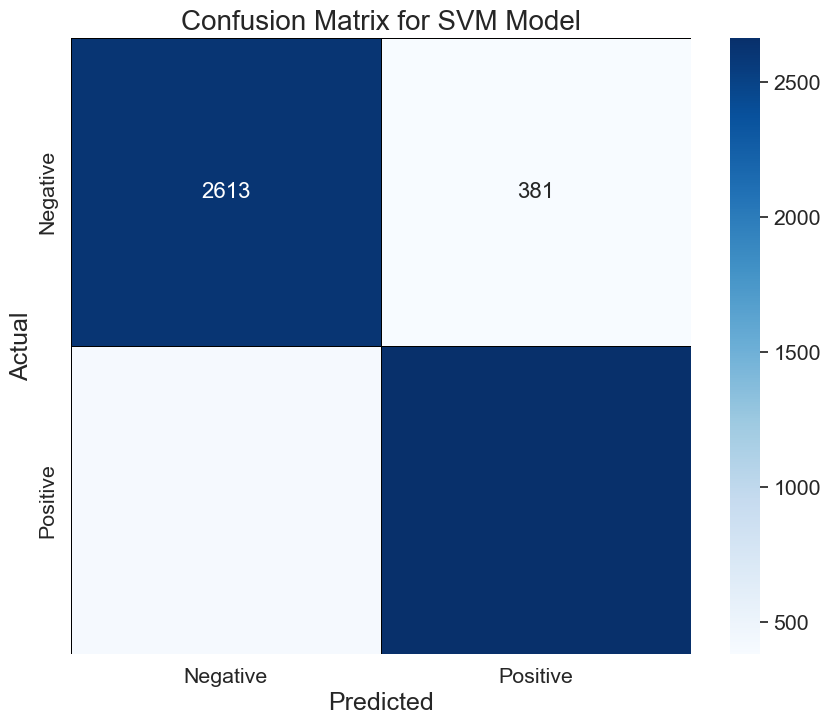

In [33]:
# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with enhanced visualization
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], linewidths=0.5, linecolor='black')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix for SVM Model', fontsize=20)
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Including more predictive features
X = data[['year', 'month', 'pcode', 'rfe', 'ndvi', 'temp', 'pdi', 'tdi', 'vdi', 'cdi']]
y = data['target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluating the model
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy as a percentage
print(f"Naive Bayes Model Accuracy: {accuracy * 100:.2f}%")

# Generating and displaying the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Naive Bayes Model Accuracy: 92.88%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2994
           1       0.95      0.91      0.93      3073

    accuracy                           0.93      6067
   macro avg       0.93      0.93      0.93      6067
weighted avg       0.93      0.93      0.93      6067



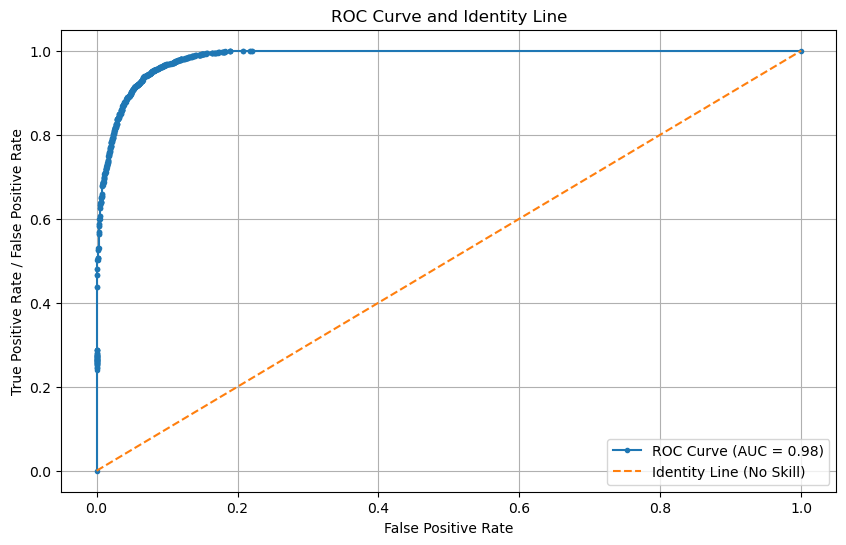

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for the Naive Bayes model
fpr, tpr, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)  # AUC for the ROC

# Plotting both the ROC curve and the Identity line in one figure
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', marker='.', linestyle='-')
plt.plot(fpr, fpr, linestyle='--', label='Identity Line (No Skill)')
plt.title('ROC Curve and Identity Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate / False Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


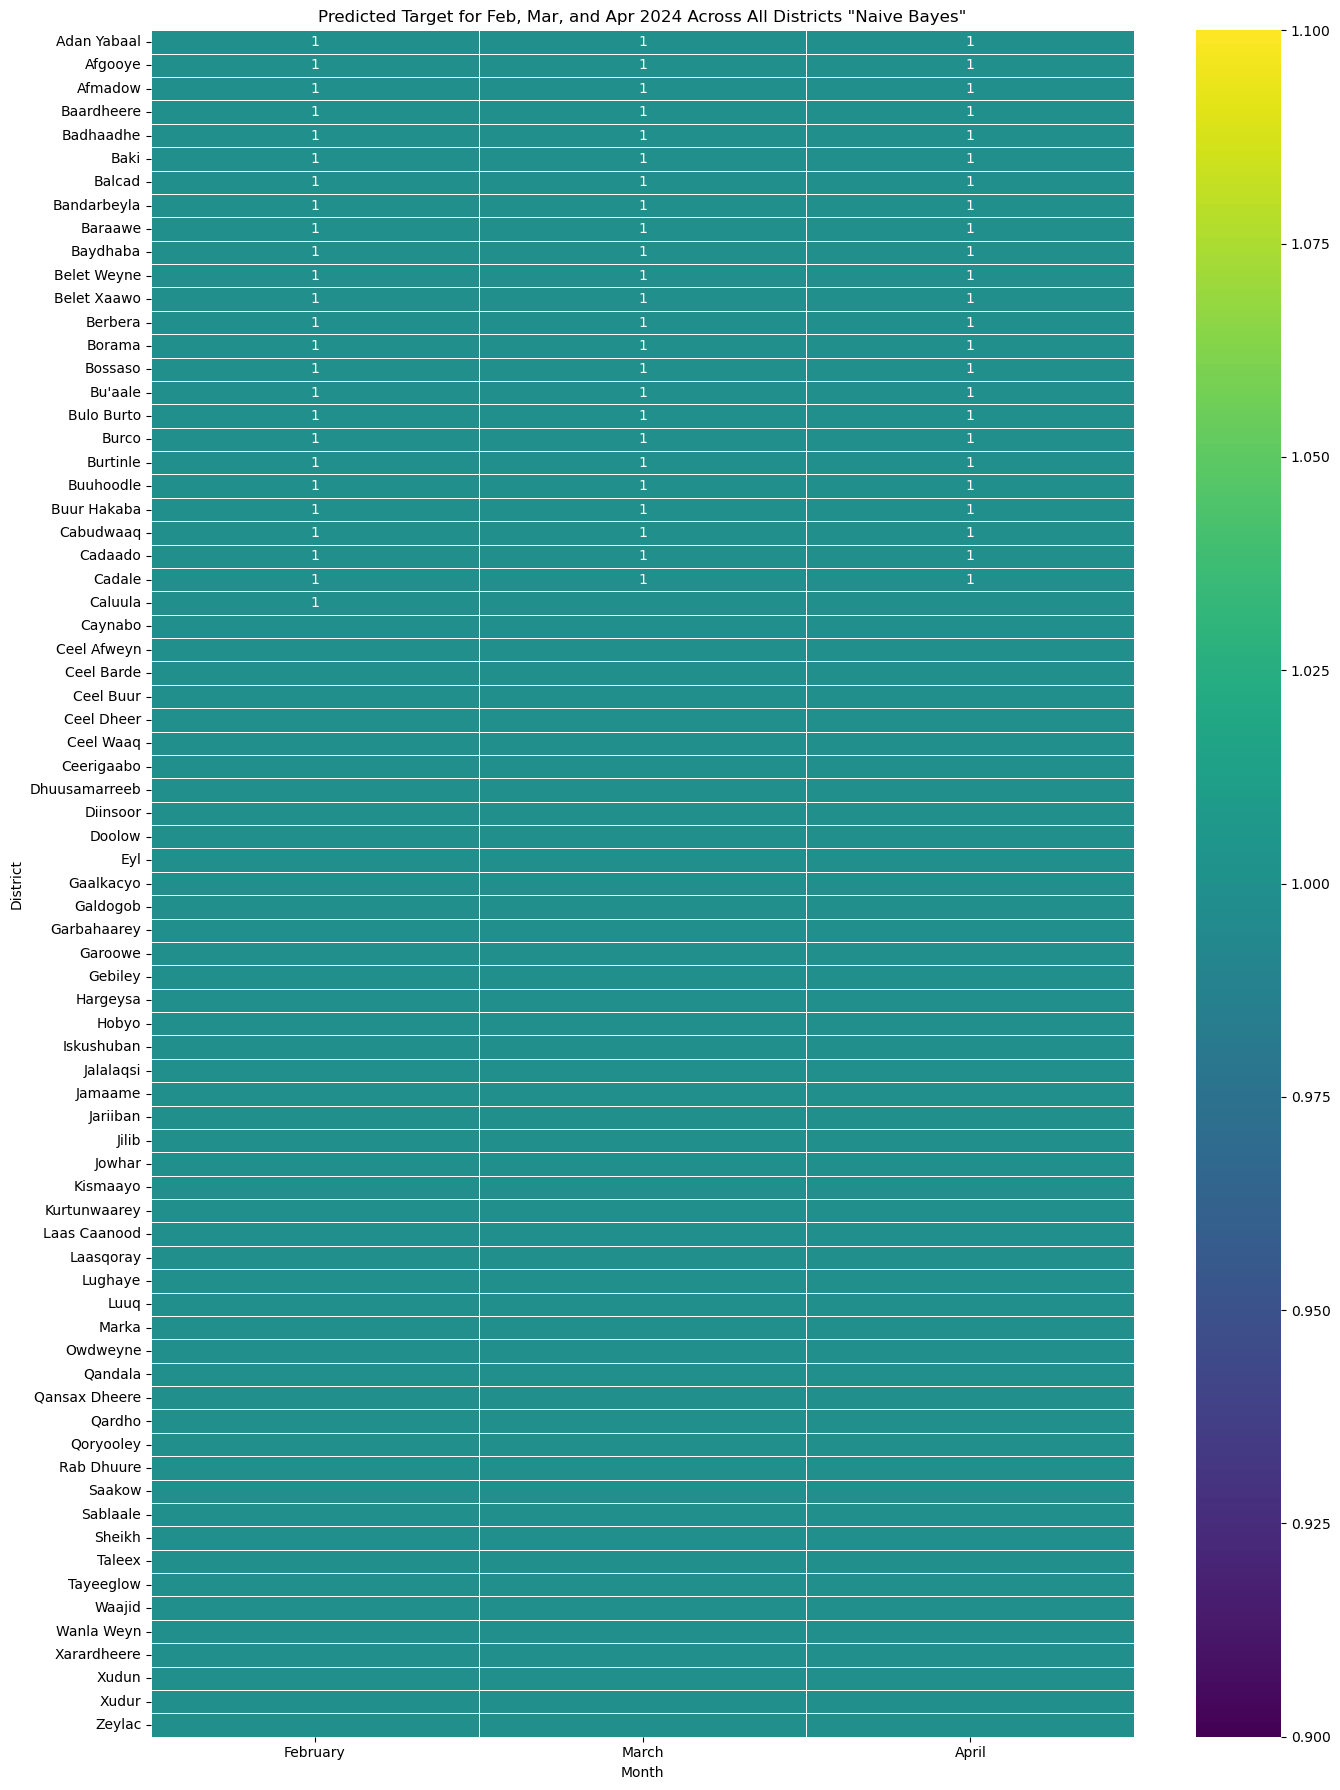

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Encoding the 'district' column
label_encoder = LabelEncoder()
data['district_encoded'] = label_encoder.fit_transform(data['district'])

# Selecting features and target
X = data[['year', 'month', 'pcode', 'district_encoded']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Preparing the data for prediction
predict_months = [2, 3, 4]  # February, March, April of 2024
unique_pcodes = data['pcode'].unique()
predict_data = pd.DataFrame([(2024, month, pcode, label_encoder.transform([district])[0]) 
                             for pcode in unique_pcodes for month in predict_months 
                             for district in data[data['pcode'] == pcode]['district'].unique()],
                            columns=['year', 'month', 'pcode', 'district_encoded'])

# Predicting the target
predictions = nb_classifier.predict(predict_data[['year', 'month', 'pcode', 'district_encoded']])
predict_data['predicted_target'] = predictions

# Merging predicted data with original data to get district names
merged_data = predict_data.merge(data[['pcode', 'district']].drop_duplicates(), on='pcode')

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = merged_data.pivot(index="district", columns="month", values="predicted_target")

# Plotting the heatmap
plt.figure(figsize=(14, 18))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=True, linewidths=0.5, linecolor='white')

plt.title('Predicted Target for Feb, Mar, and Apr 2024 Across All Districts "Naive Bayes"')
plt.xlabel('Month')
plt.ylabel('District')
plt.xticks([0.5, 1.5, 2.5], ['February', 'March', 'April'])
plt.tight_layout()

plt.show()


In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from IPython.display import display


# Encoding the 'district' column
label_encoder = LabelEncoder()
data['district_encoded'] = label_encoder.fit_transform(data['district'])

# Selecting features and target
X = data[['year', 'month', 'pcode', 'district_encoded']]
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Preparing the data for prediction
predict_months = [2, 3, 4]  # February, March, April of 2024
unique_pcodes = data['pcode'].unique()
predict_data = pd.DataFrame([(2024, month, pcode, label_encoder.transform([district])[0]) 
                             for pcode in unique_pcodes for month in predict_months 
                             for district in data[data['pcode'] == pcode]['district'].unique()],
                            columns=['year', 'month', 'pcode', 'district_encoded'])

# Predicting the target
predictions = nb_classifier.predict(predict_data[['year', 'month', 'pcode', 'district_encoded']])
predict_data['predicted_target'] = predictions

# Mapping 0 and 1 to "Drought" and "No Drought"
predict_data['predicted_target'] = predict_data['predicted_target'].map({0: 'Drought', 1: 'No Drought'})

# Merging predicted data with original data to get district names
merged_data = predict_data.merge(data[['pcode', 'district']].drop_duplicates(), on='pcode')

# Creating a beautiful table
table_data = merged_data.pivot(index="district", columns="month", values="predicted_target")

# Adding column names
table_data.columns = ['February', 'March', 'April']

# Resetting index to have 'district' as a column
table_data = table_data.reset_index()

# Function to apply background colors
def highlight_drought(s):
    color = ['background-color: red; color: white' if v == 'Drought' else 'background-color: green; color: white' for v in s]
    return color

def highlight_district(s):
    return ['background-color: white; color: black'] * len(s)

# Applying styles using Styler.apply
styled_table = table_data.style.apply(highlight_drought, subset=['February', 'March', 'April'], axis=1) \
                               .apply(highlight_district, subset=['district'], axis=1) \
                               .set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f0f0f0'), ('color', '#333'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black'), ('padding', '5px'),('width', '250px')]
    }]
).set_caption("Predicted Targets for February, March, and April 2024 (Naive Bayes Model)")

display(styled_table)


,district,February,March,April
0,Adan Yabaal,No Drought,No Drought,No Drought
1,Afgooye,No Drought,No Drought,No Drought
2,Afmadow,No Drought,No Drought,No Drought
3,Baardheere,No Drought,No Drought,No Drought
4,Badhaadhe,No Drought,No Drought,No Drought
5,Baki,No Drought,No Drought,No Drought
6,Balcad,No Drought,No Drought,No Drought
7,Bandarbeyla,No Drought,No Drought,No Drought
8,Baraawe,No Drought,No Drought,No Drought
9,Baydhaba,No Drought,No Drought,No Drought


In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[2613  381]
 [ 410 2663]]


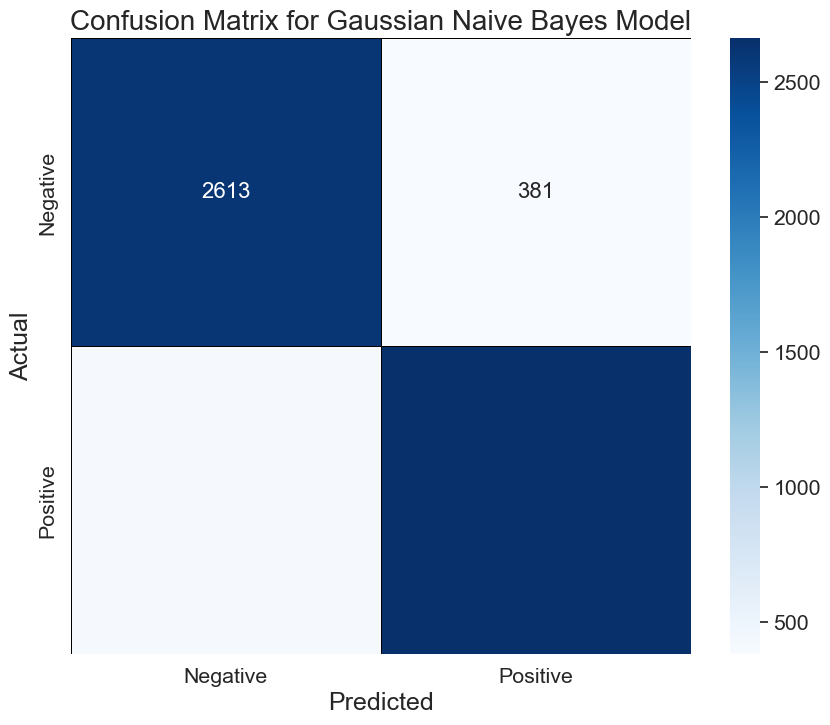

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
# y_test: true labels
# y_pred: predicted labels by the trained model

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with enhanced visualization
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], linewidths=0.5, linecolor='black')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix for Gaussian Naive Bayes Model', fontsize=20)
plt.show()


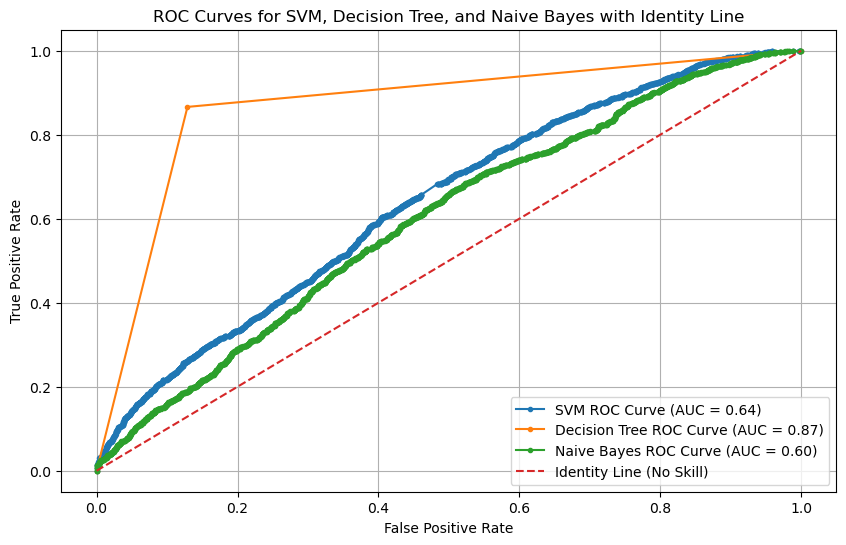

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Including more predictive features
X = data[['year', 'month', 'pcode']]
y = data['target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Training the SVM model
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Training the Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Calculate ROC curve for the SVM model
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Calculate ROC curve for the Decision Tree model
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve for the Naive Bayes model
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plotting the ROC curves and the Identity line in one figure
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC Curve (AUC = {roc_auc_svm:.2f})', marker='.', linestyle='-')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree ROC Curve (AUC = {roc_auc_dt:.2f})', marker='.', linestyle='-')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes ROC Curve (AUC = {roc_auc_nb:.2f})', marker='.', linestyle='-')
plt.plot(fpr_svm, fpr_svm, linestyle='--', label='Identity Line (No Skill)')
plt.title('ROC Curves for SVM, Decision Tree, and Naive Bayes with Identity Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [35]:
import numpy as np

# Individual confusion matrices
conf_matrix_dt = np.array([[2613, 381],
                           [410, 2663]])

conf_matrix_nb = np.array([[2613, 381],
                           [410, 2663]])

conf_matrix_svm = np.array([[2613, 381],
                            [410, 2663]])

# Combine the confusion matrices by summing corresponding elements
combined_conf_matrix = conf_matrix_dt + conf_matrix_nb + conf_matrix_svm

# Printing the combined confusion matrix as text
combined_conf_matrix_text = f"""
Combined Confusion Matrix for Decision Tree, Gaussian Naive Bayes, and SVM Models:
-------------------------------------------------
                  | Predicted Negative | Predicted Positive
-------------------------------------------------
Actual Negative   | {combined_conf_matrix[0, 0]:>18} | {combined_conf_matrix[0, 1]:>17}
-------------------------------------------------
Actual Positive   | {combined_conf_matrix[1, 0]:>18} | {combined_conf_matrix[1, 1]:>17}
-------------------------------------------------
"""

print(combined_conf_matrix_text)



Combined Confusion Matrix for Decision Tree, Gaussian Naive Bayes, and SVM Models:
-------------------------------------------------
                  | Predicted Negative | Predicted Positive
-------------------------------------------------
Actual Negative   |               7839 |              1143
-------------------------------------------------
Actual Positive   |               1230 |              7989
-------------------------------------------------



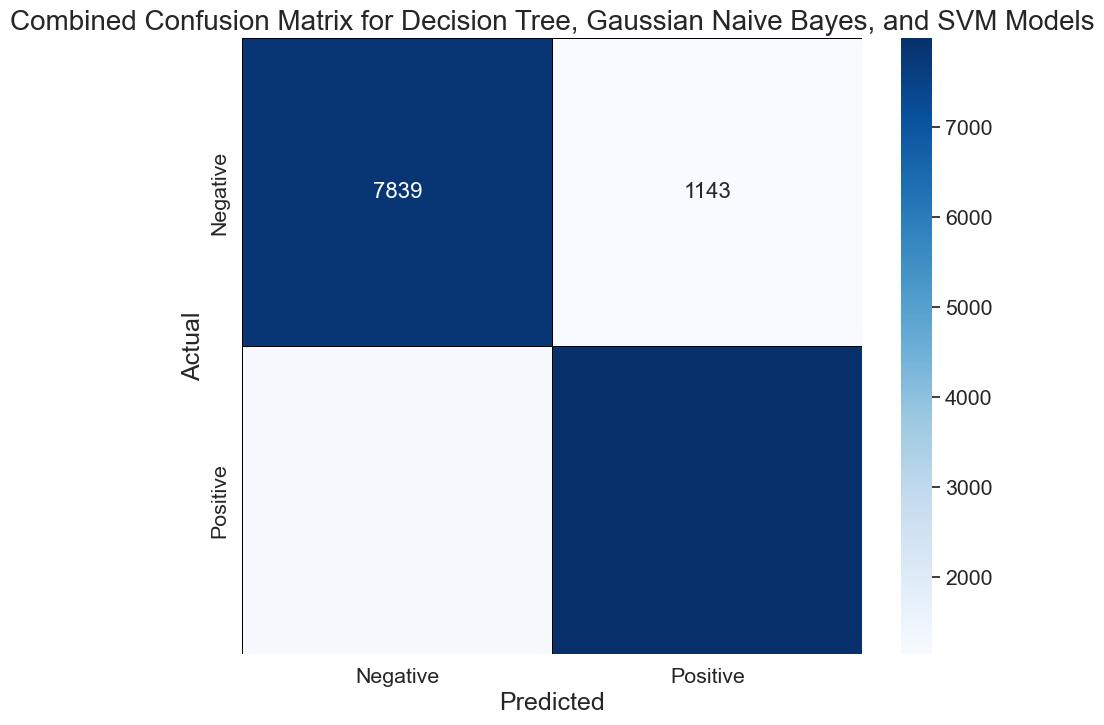

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Individual confusion matrices (assuming they have been calculated as shown previously)
conf_matrix_dt = np.array([[2613, 381],
                           [410, 2663]])

conf_matrix_nb = np.array([[2613, 381],
                           [410, 2663]])

conf_matrix_svm = np.array([[2613, 381],
                            [410, 2663]])

# Combine the confusion matrices by summing corresponding elements
combined_conf_matrix = conf_matrix_dt + conf_matrix_nb + conf_matrix_svm

# Plotting the combined confusion matrix with enhanced visualization
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(combined_conf_matrix, annot=True, annot_kws={"size": 16}, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], linewidths=0.5, linecolor='black')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Combined Confusion Matrix for Decision Tree, Gaussian Naive Bayes, and SVM Models', fontsize=20)
plt.show()


In [8]:
# Prepare data for Decision Tree
X_dt = data[['year', 'month', 'pcode']]
y_dt = data['target']
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)
dt_classifier.fit(X_train_dt, y_train_dt)
y_pred_dt = dt_classifier.predict(X_test_dt)
report_dt = classification_report(y_test_dt, y_pred_dt, output_dict=True)

# Prepare data for SVM and Naive Bayes
X = data[['year', 'month', 'pcode', 'rfe', 'ndvi', 'temp', 'pdi', 'tdi', 'vdi', 'cdi']]
y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train and evaluate SVM
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Train and evaluate Naive Bayes
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'Naive Bayes'],
    'Precision': [report_dt['weighted avg']['precision'], report_svm['weighted avg']['precision'], report_nb['weighted avg']['precision']],
    'Recall': [report_dt['weighted avg']['recall'], report_svm['weighted avg']['recall'], report_nb['weighted avg']['recall']],
    'F1-score': [report_dt['weighted avg']['f1-score'], report_svm['weighted avg']['f1-score'], report_nb['weighted avg']['f1-score']],
    'Accuracy': [accuracy_score(y_test_dt, y_pred_dt), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_nb)]
})

summary_df.set_index('Model', inplace=True)
summary_df


,Precision,Recall,F1-score,Accuracy
Model,,,,
Decision Tree,0.869673,0.869623,0.869628,0.869623
SVM,0.989789,0.989781,0.989781,0.989781
Naive Bayes,0.929480,0.928795,0.928786,0.928795


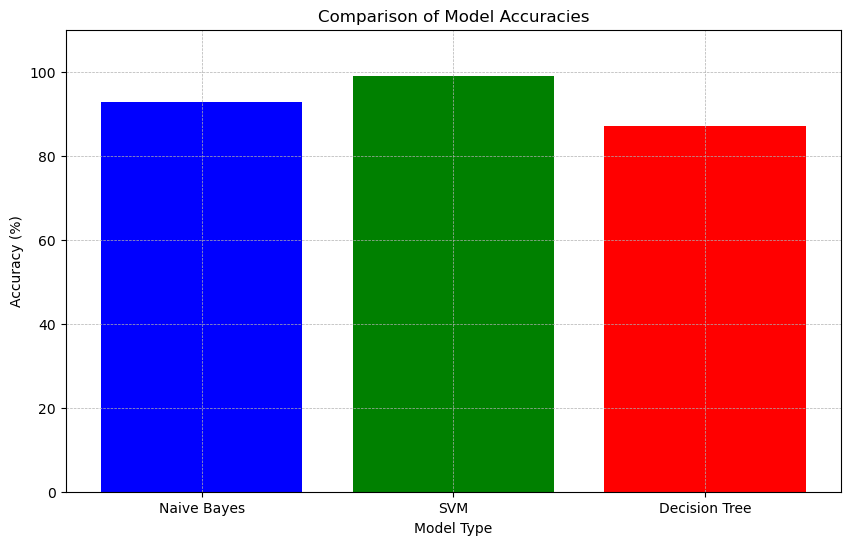

In [14]:
# Updated accuracies for visual comparison
updated_model_accuracies = {
    "Naive Bayes": 92.88, 
    "SVM": 98.98,          
    "Decision Tree": 86.96 
}

# Creating a bar plot for visual comparison of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(updated_model_accuracies.keys(), updated_model_accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model Type')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 110])  # Setting y-axis limits for better visualization of differences
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
